### Imports

Fill in path to NeuroPy modules and example data from `Data` folder in the following cell

In [1]:
import sys
neuropy_dir = "/Users/nkinsky/Documents/UM/GitHub/NeuroPy" # Add your path to NeuroPy modules here

In [2]:
%load_ext autoreload
%autoreload 2

sys.path.extend([neuropy_dir])  # Add NeuroPy modules

import platform
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.signal as sg
import matplotlib.pyplot as plt
from neuropy.utils.mathutil import min_max_scaler
from scipy.ndimage import gaussian_filter1d, gaussian_filter

from neuropy import plotting
from neuropy.analyses.placefields import Pf1D
from neuropy.plotting import plot_ratemap
from neuropy.plotting.figure import Fig
from neuropy.utils.misc import flatten
from neuropy.core import Neurons, Position

/Users/nkinsky/mambaforge/envs/NeuroPy/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Construct placefield object

In [3]:
# Get base file names for RatU Day2 NSD data from track running.
data_dir = Path(neuropy_dir) / "examples" / "Data"
file_use = data_dir / "RatU_Day2NSD_2021-07-24_08-16-38"
neurons = Neurons.from_file(file_use.with_suffix(".neurons_stable_maze.npy"), convert=True)
maze = Position.from_file(file_use.with_suffix(".maze.linear.npy"), convert=True)
kw = dict(frate_thresh=0, grid_bin=5)  # Define placefield parameters

pfmaze = Pf1D(neurons, position=maze, **kw)  # Create placefield object

### Plot animal behavior on track

Text(0, 0.5, 'Distance (cm)')

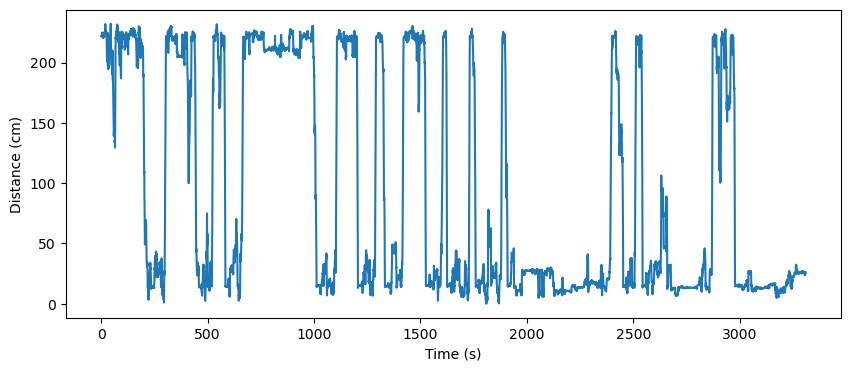

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(maze.time - maze.t_start, maze.x)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance (cm)')

### Plot all placefields

/Users/nkinsky/Documents/UM/GitHub/NeuroPy/neuropy/utils/mathutil.py:67: RuntimeWarning: invalid value encountered in divide
  return (x - np.min(x, axis=axis, keepdims=True)) / np.ptp(


<Axes: xlabel='Position'>

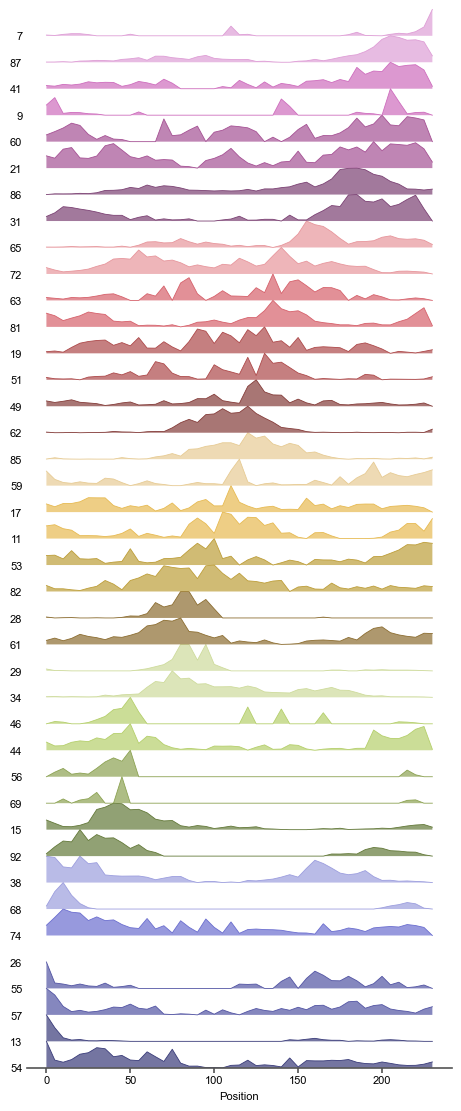

In [5]:
pfmaze_ds = pfmaze.neuron_slice(list(np.arange(40, dtype=int)))  # Keep only 40 neurons to make visualization more manageable
pfmaze_ds.plot_ratemaps(normalize_tuning_curve=True)

### Now plot placefields with rasters

In [6]:
# Grab one neuron from the beginning, middle, and end, both by index and by id
ids = [54, 85, 87] 
inds = [20, 36, 38] # or [np.where(id == pfmaze_ds.neuron_ids)[0][0] for id in ids]

#### Loop through by id and plot raster for each neuron

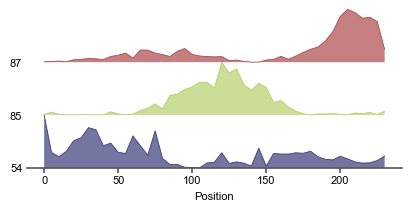

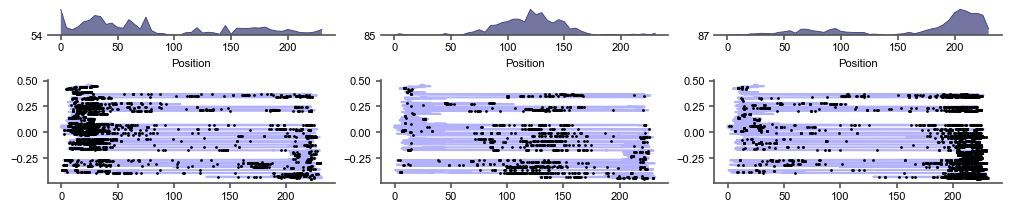

In [7]:
_, ax = plt.subplots(1, 1, figsize=(4, 2))
pfmaze_ds.neuron_slice(ids=ids).plot_ratemaps(normalize_tuning_curve=True, ax=ax)
_, ax2 = plt.subplots(2, 3, figsize=(10, 2), height_ratios=[1, 4])
for id, a in zip(ids, ax2.T):
    pfmaze_ds.plot_ratemap_w_raster(id=id, ax=a)

#### Same but plot by index this time

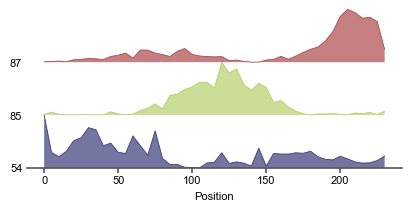

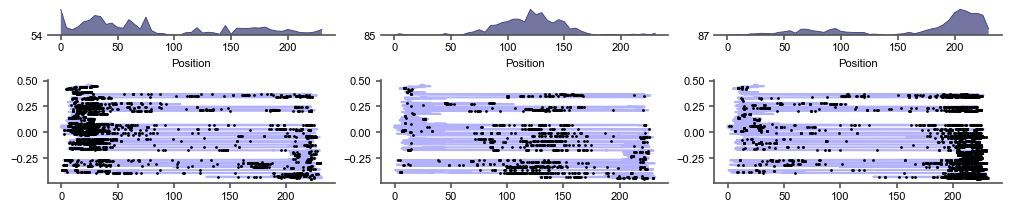

In [8]:
_, ax = plt.subplots(1, 1, figsize=(4, 2))
pfmaze_ds.neuron_slice(ids=ids).plot_ratemaps(normalize_tuning_curve=True, ax=ax)
_, ax2 = plt.subplots(2, 3, figsize=(10, 2), height_ratios=[1, 4])
for ind, a in zip(inds, ax2.T):
    pfmaze_ds.plot_ratemap_w_raster(ind=ind, ax=a)